In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN



In [2]:
# Load CSV file into DataFrame
pune_EV = pd.read_csv('pune_EV.csv')

In [3]:
pune_EV.head()

,No.,Region,address,latitude,longitude,power,ratings,pincode,timing,availability
0,1,sus,"Shell Recharge Charging Station, Sus Ln, Sus, ...",18.553462,73.756114,7.4 kW,4.6,411021,24h,y
1,2,Balewadi,"Balewadi, Pune, Maharashtra",18.579631,73.762776,7.4 kW,4.6,411045,24h,y
2,3,Balewadi,"The Orchid Hotel, SHREE SHIV CHHATRAPATI SPORT...",18.570929,73.764921,7.4 kW,4.3,411045,6 am - 11 pm,y
3,4,Hinjawaadi,"HPR3+2R5, Highmont Rd, Phase 2, Hinjewadi Raji...",18.592928,73.703307,7.4 kW,4.1,411057,24h,y
4,5,Hinjawaadi,"Opposite Indialand Global Tech Park, Old Yes B...",18.596145,73.724591,7.4 kW,5.0,411057,9 am - 9 pm,y


In [4]:
# Extract relevant features for clustering
X = pune_EV[['latitude', 'longitude']].values

In [5]:
# Train K-Means clustering model
kmeans = KMeans(n_clusters=7, random_state=42) # Specify the number of clusters
kmeans.fit(X)
pune_EV['kmeans_labels'] = kmeans.labels_

# Train Gaussian Mixture Model (GMM) clustering model
gmm = GaussianMixture(n_components=7, random_state=42) # Specify the number of components
gmm.fit(X)
pune_EV['gmm_labels'] = gmm.predict(X)

# Train Agglomerative Clustering model
agg = AgglomerativeClustering(n_clusters=7)
agg.fit(X)
pune_EV['agg_labels'] = agg.labels_

# Train DBSCAN clustering model
dbscan = DBSCAN(eps=0.3, min_samples=10) # Specify the epsilon and min_samples values
dbscan.fit(X)
pune_EV['dbscan_labels'] = dbscan.labels_

c:\Users\Dell\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\Dell\AppData\Local\Temp\ipykernel_20832\2022638554.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0, 0].scatter(X[:, 1], X[:, 0], c=map_labels_to_colors(pune_EV['kmeans_labels'].values), cmap='viridis')
C:\Users\Dell\AppData\Local\Temp\ipykernel_20832\2022638554.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0, 1].scatter(X[:, 1], X[:, 0], c=map_labels_to_colors(pune_EV['gmm_labels'].values), cmap='viridis')
C:\Users\Dell\AppData\Local\Temp\ipykernel_20832\2022638554.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[1, 0].scatter(X[:, 1], X[:, 0], c=map_labels_to_colors(pune_EV['agg_labels'].values), cmap='viridis')


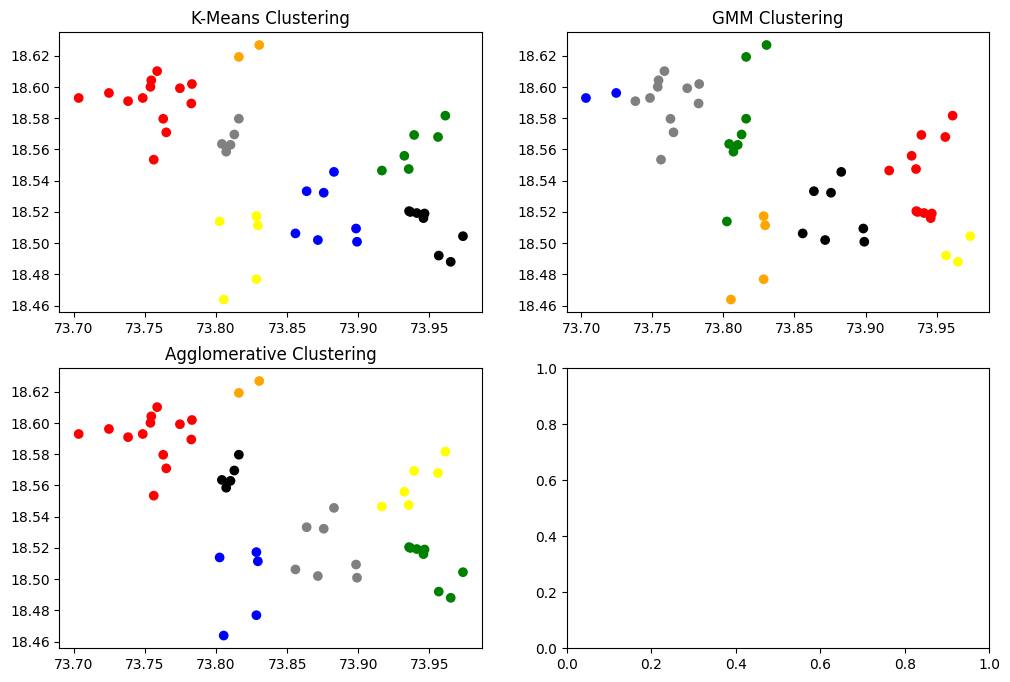

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Define custom colors for clusters
colors = ['red', 'green', 'blue', 'black', 'grey', 'yellow', 'orange']  # Specify colors for each cluster label

# Define a function to map labels to colors
map_labels_to_colors = np.vectorize(lambda x: colors[x])

# Visualize the results
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].scatter(X[:, 1], X[:, 0], c=map_labels_to_colors(pune_EV['kmeans_labels'].values), cmap='viridis')
axes[0, 0].set_title('K-Means Clustering')
axes[0, 1].scatter(X[:, 1], X[:, 0], c=map_labels_to_colors(pune_EV['gmm_labels'].values), cmap='viridis')
axes[0, 1].set_title('GMM Clustering')
axes[1, 0].scatter(X[:, 1], X[:, 0], c=map_labels_to_colors(pune_EV['agg_labels'].values), cmap='viridis')
axes[1, 0].set_title('Agglomerative Clustering')
plt.show()

In [7]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores
kmeans_silhouette_score = silhouette_score(X, pune_EV['kmeans_labels'])
gmm_silhouette_score = silhouette_score(X, pune_EV['gmm_labels'])
agg_silhouette_score = silhouette_score(X, pune_EV['agg_labels'])

print("K-Means Silhouette Score:", kmeans_silhouette_score)
print("GMM Silhouette Score:", gmm_silhouette_score)
print("Agglomerative Clustering Silhouette Score:", agg_silhouette_score)


K-Means Silhouette Score: 0.5098814565758544
GMM Silhouette Score: 0.38214723432519
Agglomerative Clustering Silhouette Score: 0.5098814565758544


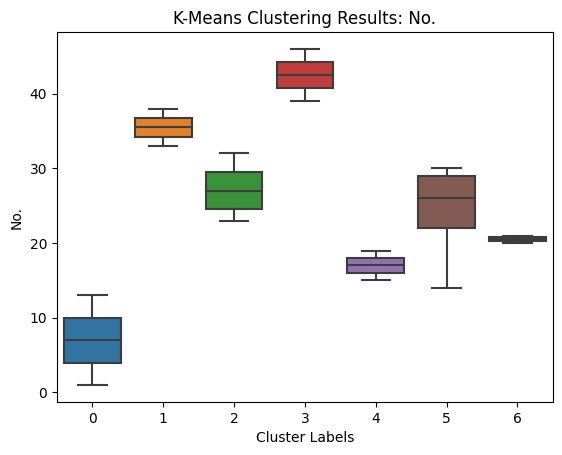

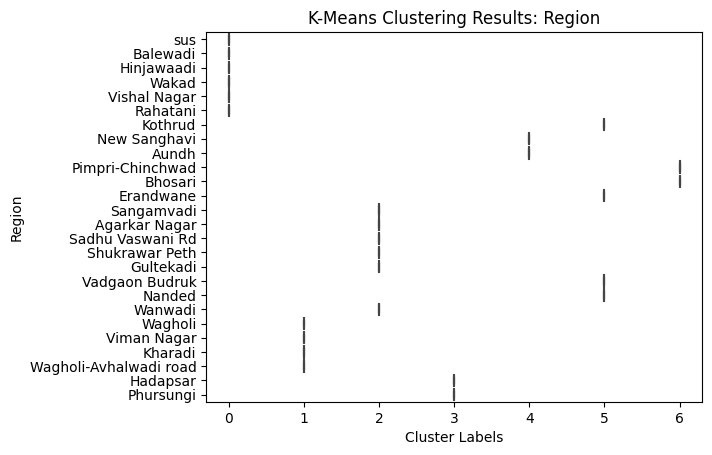

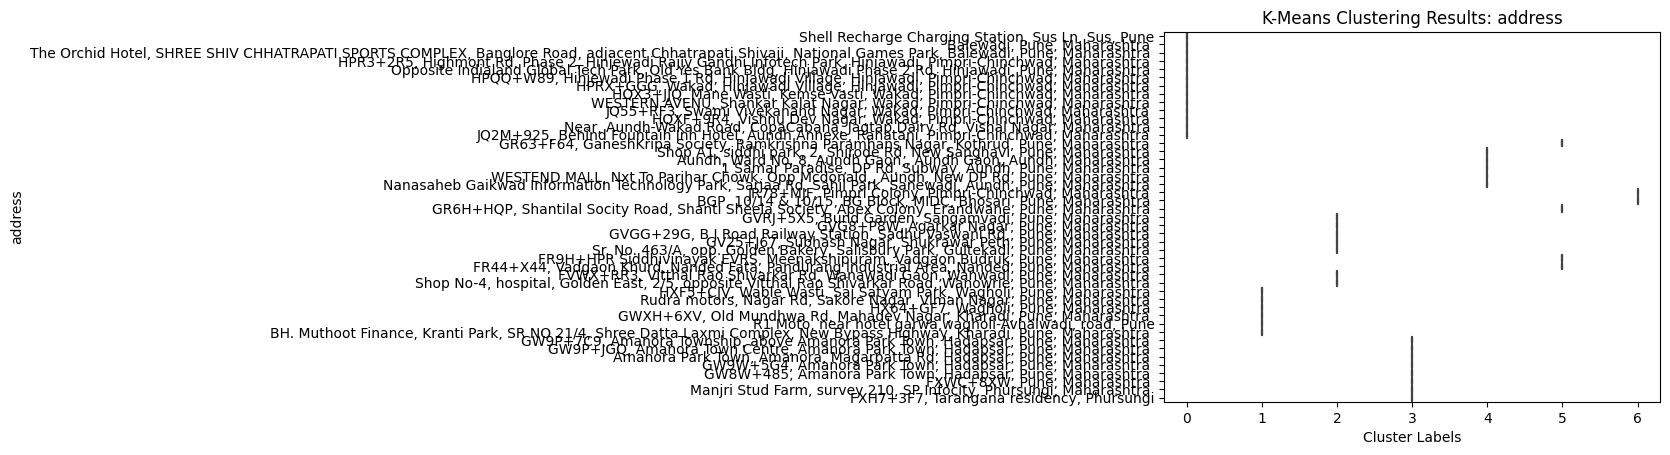

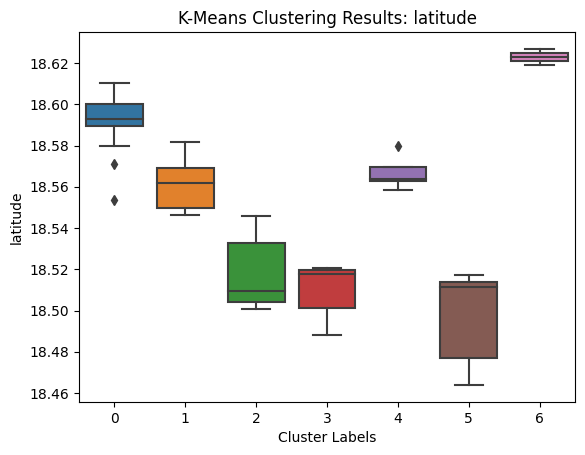

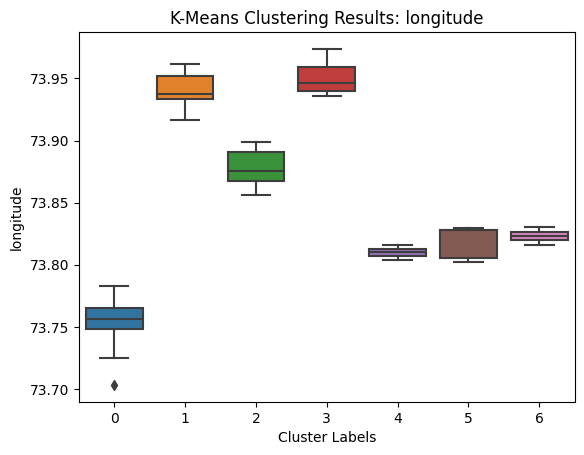

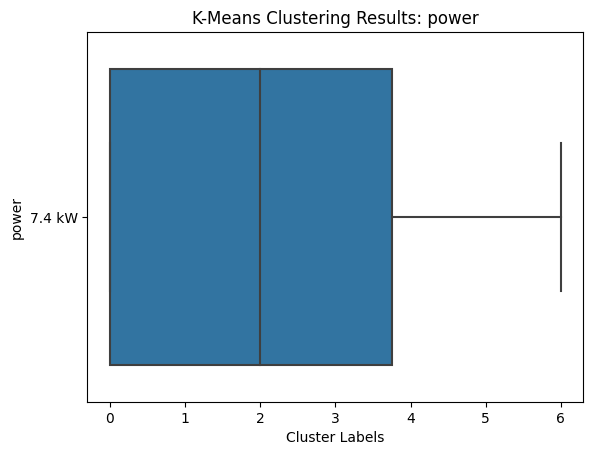

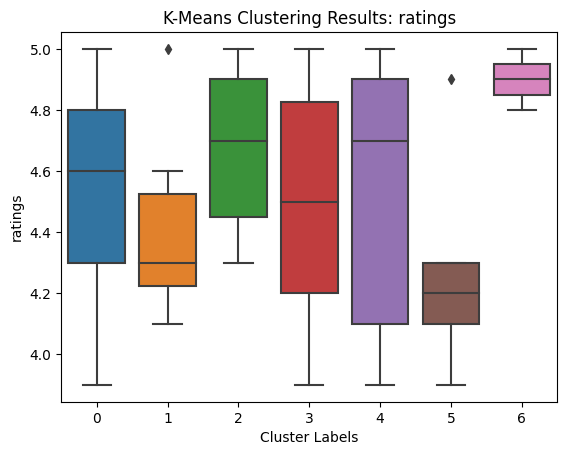

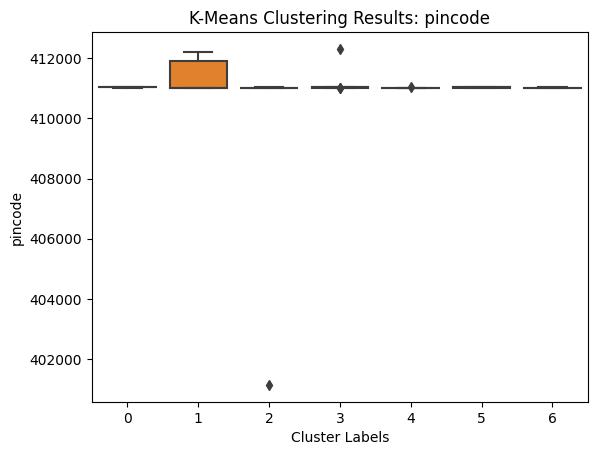

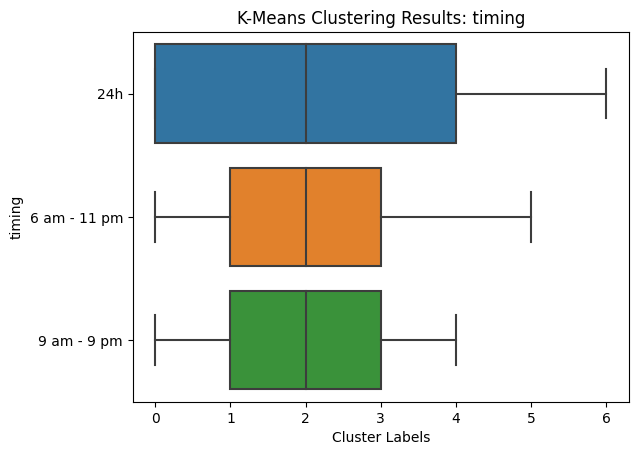

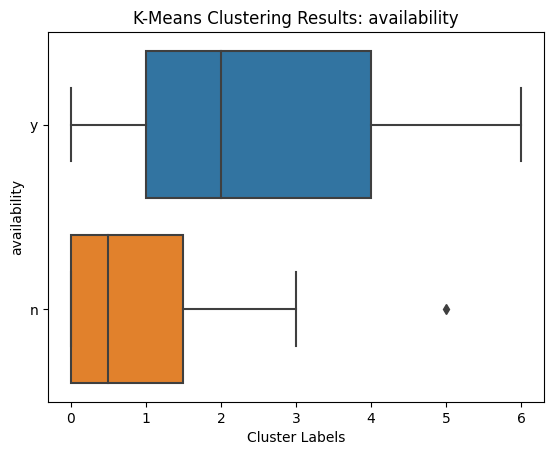

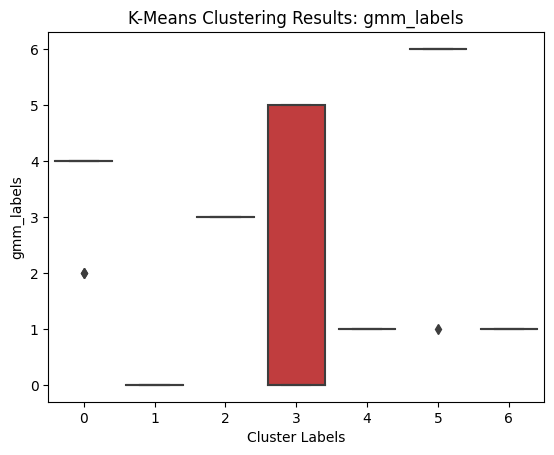

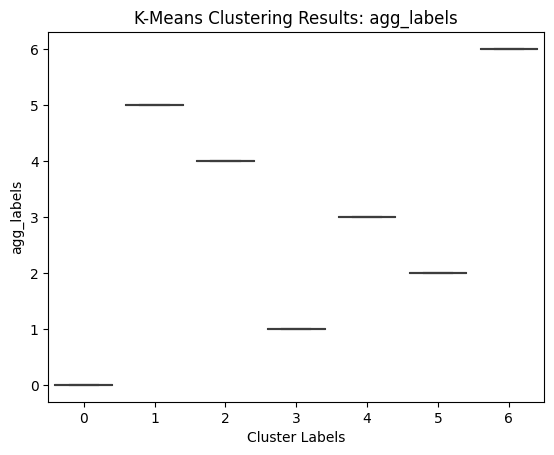

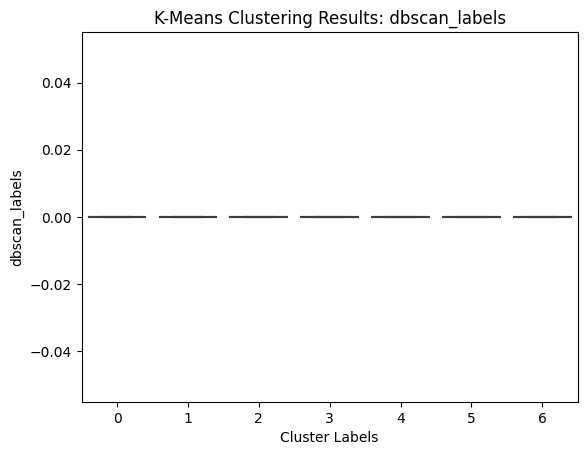

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract cluster labels and attribute values from K-Means clustering
cluster_labels = pune_EV['kmeans_labels']
attribute_values = pune_EV.drop(['kmeans_labels'], axis=1)  # Drop the cluster labels column

# Create box plots for each attribute, grouped by cluster labels
for column in attribute_values.columns:
    sns.boxplot(x=cluster_labels, y=attribute_values[column])
    plt.xlabel('Cluster Labels')
    plt.ylabel(column)
    plt.title(f'K-Means Clustering Results: {column}')
    plt.show()

In [27]:
# Take input of latitude and longitude
latitude = input() #18.5204  # Enter value from 18.46 to 18.62
longitude = input()#73.8567  # Enter value from 73.70 to 73.97

# Create a new data point with the input latitude and longitude
new_data = np.array([[latitude, longitude]])

# Predict the cluster label for the new data point using the trained K-Means model
predicted_label = kmeans.predict(new_data)

# Print the predicted cluster label
print("Predicted Cluster Label:", predicted_label[0])

Predicted Cluster Label: 5


In [28]:
# Extract the addresses in the predicted cluster
predicted_cluster_label = predicted_label[0]
addresses_in_predicted_cluster = pune_EV[pune_EV['kmeans_labels'] == predicted_cluster_label]['address']

# Print the addresses in the predicted cluster
print("Addresses in Predicted Cluster:")
for address in addresses_in_predicted_cluster:
    print(address)


Addresses in Predicted Cluster:
GR63+F64, GaneshKripa Society, Ramkrishna Paramhans Nagar, Kothrud, Pune, Maharashtra 
GR6H+HQP, Shantilal Socity Road, Shanti Sheela Society, Apex Colony, Erandwane, Pune, Maharashtra 
GR6H+HQP, Shantilal Socity Road, Shanti Sheela Society, Apex Colony, Erandwane, Pune, Maharashtra 
FR9H+HPR Siddhivinayak EVRS, Meenakshipuram, Vadgaon Budruk, Pune, Maharashtra 
FR44+X44, Vadgaon Khurd, Nanded Fata, Pandurang Industrial Area, Nanded, Pune, Maharashtra 


In [29]:
import geopy.distance



# Calculate distances between input latitude/longitude and all addresses in the dataset
pune_EV['distance'] = pune_EV.apply(lambda row: geopy.distance.distance((latitude, longitude),
                                                                     (row['latitude'], row['longitude'])).km, axis=1)

# Find the address with the minimum distance
nearest_address = pune_EV.loc[pune_EV['distance'].idxmin(), 'address']

# Print the nearest address
print("Nearest Address:")
print(nearest_address)

Nearest Address:
Shell Recharge Charging Station, Sus Ln, Sus, Pune


In [30]:
def preprocess_timing(timing_str):
    if timing_str == '24h':
        return 24
    elif 'am -' in timing_str and 'pm' in timing_str:
        # Extract the start and end times
        start_time, end_time = timing_str.split('-')
        start_time = start_time.strip()  # Remove leading/trailing spaces
        end_time = end_time.strip()  # Remove leading/trailing spaces
        start_hour = int(start_time.split()[0])
        end_hour = int(end_time.split()[0])
        # Calculate the hours of operation
        hours_of_operation = end_hour - start_hour
        return hours_of_operation
    else:
        return 0  # Handle other cases as needed


In [31]:
# User-defined attribute weights input
print("Enter the weights for each attribute on a scale from 0 to 9:")
ratings_weight = float(input("Ratings Weight (0-9): "))
timing_weight = float(input("Timing Weight (0-9): "))
availability_weight = float(input("Availability Weight (0-9): "))
cluster_weight = float(input("Cluster Weight (0-9): "))

# Ensure that the user-provided weights are within the desired range (0-9)
if (
    0 <= ratings_weight <= 9 and
    0 <= timing_weight <= 9 and
    0 <= availability_weight <= 9 and
    0 <= cluster_weight <= 9
):
    # Calculate a score for each charging station based on user-defined weights
    pune_EV['score'] = (
        ratings_weight * pune_EV['ratings'] +
        timing_weight * pune_EV['timing'] +
        availability_weight * pune_EV['availability'] +
        cluster_weight * (pune_EV['kmeans_labels'] == predicted_cluster_label).astype(int)
    )

    # Sort charging stations by score in descending order
    recommended_stations = pune_EV.sort_values(by='score', ascending=False)

    # Print the recommended charging stations
    print("\nRecommended Charging Stations:")
    for _, station in recommended_stations.iterrows():
        print("Address:", station['address'])
        print("Score:", station['score'])
else:
    print("Weights should be in the range from 0 to 9.")


Enter the weights for each attribute on a scale from 0 to 9:

Recommended Charging Stations:
Address: FR44+X44, Vadgaon Khurd, Nanded Fata, Pandurang Industrial Area, Nanded, Pune, Maharashtra 
Score: 178.6
Address: GR6H+HQP, Shantilal Socity Road, Shanti Sheela Society, Apex Colony, Erandwane, Pune, Maharashtra 
Score: 175.4
Address: FR9H+HPR Siddhivinayak EVRS, Meenakshipuram, Vadgaon Budruk, Pune, Maharashtra 
Score: 174.6
Address: Shop No-4, hospital, Golden East, 2/5, opposite Vitthal Rao Shivarkar Road, Wanowrie, Pune, Maharashtra 
Score: 171.0
Address: GW8W+485, Amanora Park Town, Hadapsar, Pune, Maharashtra 
Score: 171.0
Address: BGP, 10/14 & 10/15, BG Block, MIDC, Bhosari, Pune, Maharashtra 
Score: 171.0
Address: HQX3+JJQ, Mane Wasti, Kemse Vasti, Wakad, Pimpri-Chinchwad, Maharashtra 
Score: 170.6
Address: Nanasaheb Gaikwad Information Technology Park, Sarjaa Rd, Sahil Park, Sanewadi, Aundh, Pune, Maharashtra 
Score: 170.6
Address: Amanora Park Town, Amanora, Magarpatta Rd, Ha